In [107]:
import torch

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
if torch.cuda.is_available():
    print(torch.cuda.current_device())
    print(torch.cuda.device_count())
    print(torch.cuda.get_device_name(0))

device

device(type='cpu')

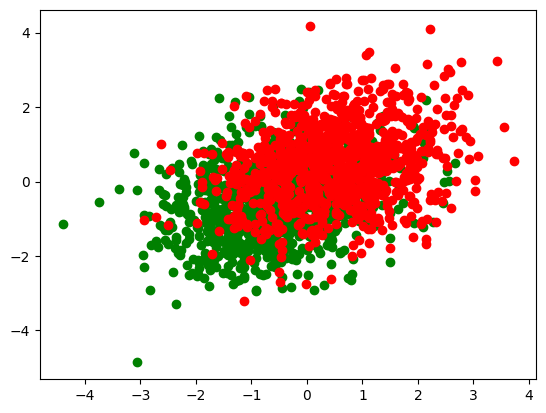

X: tensor([[ 0.8917, -1.4432],
        [-1.0427,  1.3206],
        [ 0.4922,  0.1177],
        ...,
        [ 2.8945,  2.3127],
        [ 0.2819,  1.0146],
        [ 0.1103,  1.6682]])


In [108]:
import torch
import matplotlib.pyplot as plt
import numpy as np
covariance = torch.tensor([[1, 0.25],[0.25, 1]])
mean_a = torch.tensor([-0.5, -0.5])
mean_b = torch.tensor([0.5, 0.5])
normal_distribution_a = torch.distributions.MultivariateNormal(mean_a, covariance).sample((1000,))
normal_distribution_b = torch.distributions.MultivariateNormal(mean_b, covariance).sample((1000,))
X = torch.cat([normal_distribution_a, normal_distribution_b])
plt.plot(normal_distribution_a[:,0], normal_distribution_a[:,1],'go')
plt.plot(normal_distribution_b[:,0], normal_distribution_b[:,1],'ro')
plt.show()
print("X:", X)



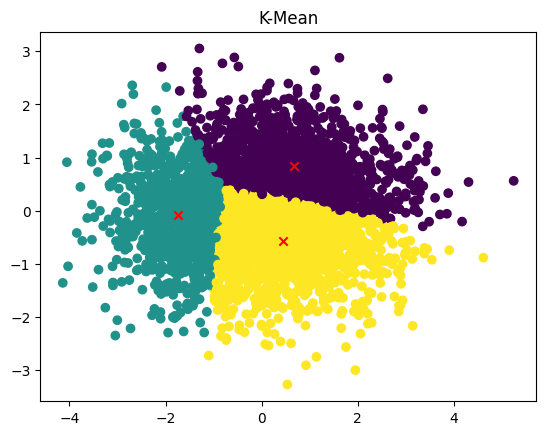

Data: tensor([[-0.1788, -0.6954],
        [-0.5434, -1.2790],
        [ 1.1431, -0.3007],
        ...,
        [ 1.0728,  1.3367],
        [-0.9832,  0.3183],
        [ 1.0317,  0.5691]])


In [217]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from IPython.display import clear_output
from sklearn.cluster import KMeans
covariance = torch.tensor([[1, 0.25],[0.25, 1]])
mean_a = torch.tensor([-0.5, -0.5])
mean_b = torch.tensor([0.5, 0.5])
normal_distribution_a = torch.distributions.MultivariateNormal(mean_a, covariance).sample((2000,))
normal_distribution_b = torch.distributions.MultivariateNormal(mean_b, covariance).sample((2000,))
X = torch.cat([normal_distribution_a, normal_distribution_b])
data = X
n = 100
i = 1
clusters = 3
index = torch.randperm(data.shape[0])[:clusters]
centroids = data[index]
old_centroids = torch.zeros_like(centroids)
for i in range(n):
    if torch.all(torch.isclose(centroids, old_centroids)):
        break
    old_centroids = centroids
    distance = torch.cdist(data, centroids)
    labels = torch.argmin(distance, dim=1)
    for j in range(clusters):
        cluster_points = data[labels == j]
        if cluster_points.size(0) > 0:  
            centroids[j] = cluster_points.mean(dim=0)
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data.numpy())
    centroids_2d = pca.transform(centroids.numpy())
    plt.title('K-Mean')
    plt.scatter(data_2d[:,0], data_2d[:,1],c=labels.numpy())
    plt.scatter(centroids_2d[:,0], centroids_2d[:,1],c='red', marker='x')
    plt.show()
print("Data:", data)



    

 

In [218]:
import torch

X=torch.normal(0,1,(100,4))
X[:,2] = 3 * X[:,0] - 2 * X[:,1] + torch.normal(0, 0.1, (100,))
X[:,3] = 1.5 * X[:,0] - 0.5 * X[:,1] + torch.normal(0, 0.1, (100,))
X = X - torch.mean(X, axis=0)
pca = PCA(n_components=4)
pca.fit(X)
principal_comps_builtin = pca.components_.T
print(principal_comps_builtin)
matrix = torch.sum(torch.stack([X[i].reshape(-1,1) @ X[i].reshape(1,-1) for i in range(100)]), dim=0) / 100
eigenvalues, eigenvectors = torch.linalg.eigh(matrix)
order = torch.argsort(eigenvalues, descending=True)
principal_comps_byhand = eigenvectors[:,order]
print(principal_comps_byhand)

[[ 0.20484427  0.48327421 -0.24727687  0.81445627]
 [-0.14012973  0.79070694 -0.28841166 -0.52150256]
 [ 0.89140199 -0.13582221 -0.35236573 -0.25058572]
 [ 0.37921626  0.35040107  0.85528431 -0.0436218 ]]
tensor([[-0.2048,  0.4833, -0.2472,  0.8145],
        [ 0.1401,  0.7907, -0.2884, -0.5215],
        [-0.8914, -0.1358, -0.3524, -0.2506],
        [-0.3792,  0.3504,  0.8553, -0.0437]])
